# Quantum Entanglement Purification

## Deutsch's Protocol

In [1]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import transpile
from qiskit.result import Counts, marginal_counts
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector, state_fidelity
from qiskit.providers.aer import StatevectorSimulator, QasmSimulator
from qiskit.circuit.library import RXGate

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
class QuantumCircuitOperations:
    def __init__(self, barrier: bool = False):
        self.barrier = barrier
    
    def create_random_statevector(self, dimensions: int) -> Statevector:
        return random_statevector(dimensions)
    
    def create_bell_pairs(self, qc: QuantumCircuit, regs: list) -> None:
        if self.barrier: qc.barrier()
        for reg in regs:
            for q in range(reg.size):
                if q % 2 == 0:
                    qc.h(reg[q])
                    qc.cx(reg[q], reg[q + 1])

In [3]:
class QuantumNativeSimulations:
    def statevector_sim(self, qc: QuantumCircuit) -> Statevector:
        # returns the circuit statevector
        state_sim: StatevectorSimulator = StatevectorSimulator()
        return state_sim.run(transpile(qc, state_sim)).result().get_statevector()
    
    def qasm_sim(self, qc: QuantumCircuit) -> Counts:
        qasm_sim: QasmSimulator = QasmSimulator()
        return qasm_sim.run(transpile(qc, qasm_sim), shots=10000).result().get_counts()

In [4]:
alice: QuantumRegister = QuantumRegister(2, "alice")
charlie: QuantumRegister = QuantumRegister(2, "charlie")
bob: QuantumRegister = QuantumRegister(2, "bob")

# crz: ClassicalRegister = ClassicalRegister(1, "crz")
# crx: ClassicalRegister = ClassicalRegister(1, "crx")

coz: ClassicalRegister = ClassicalRegister(1, "coz")
cox: ClassicalRegister = ClassicalRegister(1, "cox")
# cz: ClassicalRegister = ClassicalRegister(1, "cz")
# cx: ClassicalRegister = ClassicalRegister(1, "cx")

qc: QuantumCircuit = QuantumCircuit(alice, charlie, bob, coz, cox)

In [5]:
qco: QuantumCircuitOperations = QuantumCircuitOperations(True)
qns: QuantumNativeSimulations = QuantumNativeSimulations()

In [6]:
qco.create_bell_pairs(qc, [alice, charlie, bob])

qc1: Statevector = qns.statevector_sim(qc)

In [7]:
qc.barrier()
qc.append(RXGate(np.pi/2), [alice[0]])
qc.append(RXGate(-np.pi/2), [alice[1]])
qc.append(RXGate(np.pi/2), [charlie[0]])
qc.append(RXGate(-np.pi/2), [charlie[1]])

qc.cx(alice[0], charlie[0])
qc.cx(alice[1], charlie[1])

qc.barrier()
qc.measure(charlie[0], coz)
qc.measure(charlie[1], cox)

# qc.i(charlie[0]).c_if(coz, 1)
# qc.i(charlie[1]).c_if(cox, 1)

In [8]:
qc.barrier()
qc.append(RXGate(np.pi/2), [alice[0]])
qc.append(RXGate(-np.pi/2), [alice[1]])
qc.append(RXGate(np.pi/2), [bob[0]])
qc.append(RXGate(-np.pi/2), [bob[1]])

qc.cx(alice[0], bob[0])
qc.cx(alice[1], bob[1])

qc.barrier()
qc.measure(bob[0], coz)
qc.measure(bob[1], cox)

# qc.x(bob[0]).c_if(coz, 1)
# qc.x(bob[1]).c_if(cox, 1)

In [9]:
# qc.barrier()
# qc.cx(alice[0], alice[1])
# qc.h(alice[0])

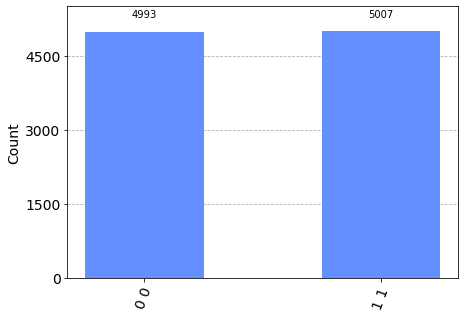

In [10]:
counts: Counts = qns.qasm_sim(qc)
fig = plot_histogram(counts)
fig

In [11]:
fig.savefig("purification_deutsch_results.jpg", dpi=500)

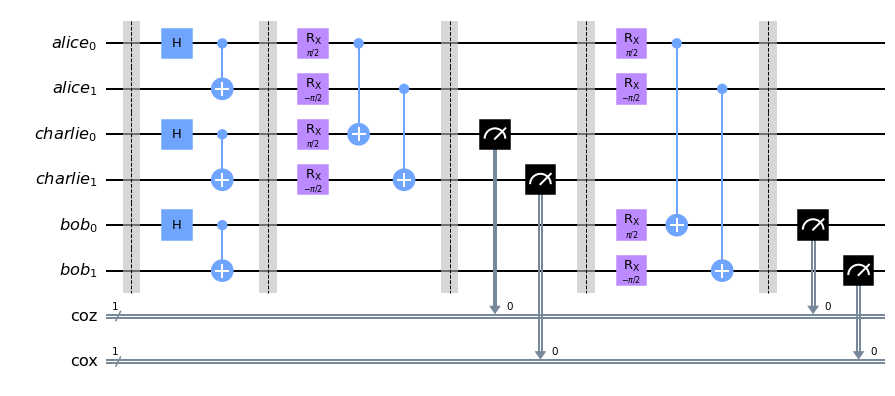

In [12]:
fig = qc.draw("mpl")
fig

In [13]:
fig.savefig("purification_deutsch.jpg", dpi=500)